In [83]:
from imputationLibrary import decompose, forwardFilling, hotDeck, meanImputation, movingAverage, splineInterpolation, randomSampleImputation, nature
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn import preprocessing
from datetime import datetime, timedelta

In [84]:
INPUT = 'output/\CompleteWeeklyIndexes'

In [85]:
df = pd.read_csv(INPUT+'.csv', parse_dates=True, index_col=0)
df_test = df.loc['2015-01-02':] #Selecting test data
df_train = df.loc['2000-01-01':'2015-01-01'] #Selecting training data
df_filled = df_train.fillna(0)
df_filled_test = df_test.fillna(0)

In [86]:
df_decomposed_resid = pd.DataFrame()
df_decomposed_trend = pd.DataFrame()
df_decomposed_seasonal = pd.DataFrame()

df_decomposed_resid_test = pd.DataFrame()
df_decomposed_trend_test = pd.DataFrame()
df_decomposed_seasonal_test = pd.DataFrame()

df_nan = df_train.isna()
df_nan_test = df_test.isna()

#df_mask_nan_resid = pd.DataFrame()
#for col in df_nan.columns:
#    df_mask_nan[col+"_resid"] = df_nan.loc[:,col]
#    df_mask_nan[col+"_trend"] = df_nan.loc[:,col]
#    df_mask_nan[col+"_seasonal"] = df_nan.loc[:,col]

In [93]:
def plot_ac(df, name):
    df = df.astype(float)
    #scaled = preprocessing.StandardScaler().fit_transform([np.array(df.fillna(0))])
    normalized = preprocessing.normalize(np.array([np.array(df.fillna(0))]))
    corr = signal.correlate(normalized, normalized, mode='full')
    plt.plot(corr[0], 'o-', markersize=2)
    plt.axhline(2/np.sqrt(len(df)), ls=':')
    plt.axhline(-2/np.sqrt(len(df)), ls=':')
    plt.title(name + ' auto-correlation')
    plt.show()

In [94]:
def decompose_and_plot(ts, flag_plot = False):
    ts_decomposed = decompose.decompose(ts)
    if flag_plot:
        ts_decomposed.plot()
        plt.show()
        print("Resid is white noise? ", nature.isWhiteNoise(ts_decomposed.resid))
        print("Resid is seasonal noise? ", nature.isSeasonal(ts_decomposed.resid))
        print("Resid is trended noise? ", nature.isTrended(ts_decomposed.resid))
        print("Resid is seasonal and trended noise? ", nature.isTrendedAndSeasonal(ts_decomposed.resid))
        plot_ac(ts_decomposed.resid, "Resid")
        plot_ac(ts_decomposed.trend, "Trend")
        plot_ac(ts_decomposed.seasonal, "Seasonal")
    return ts_decomposed.resid, ts_decomposed.trend, ts_decomposed.seasonal
    

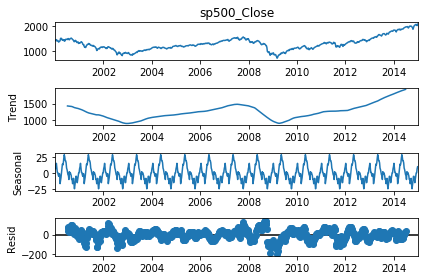

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


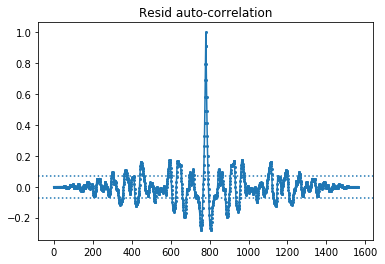

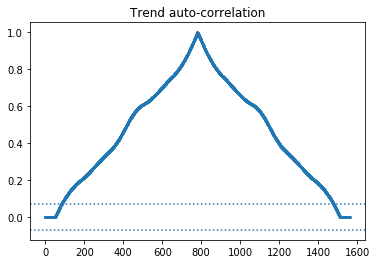

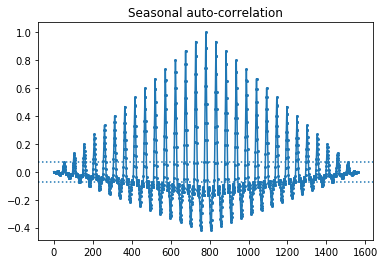

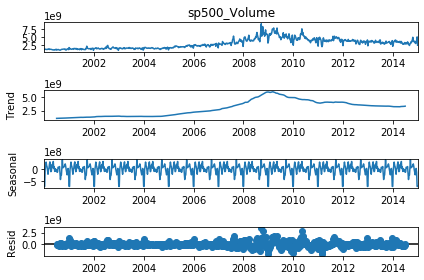

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


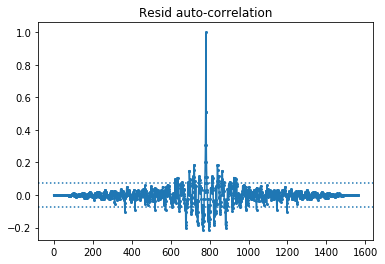

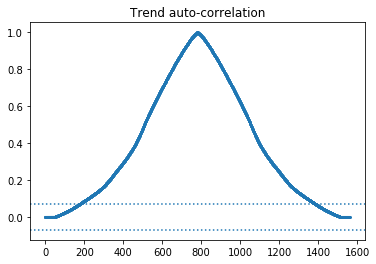

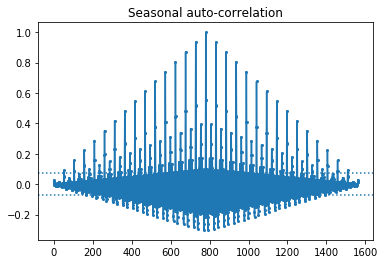

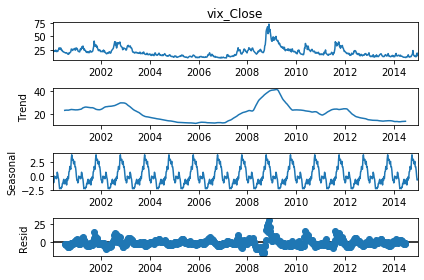

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


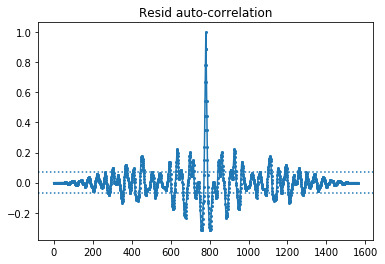

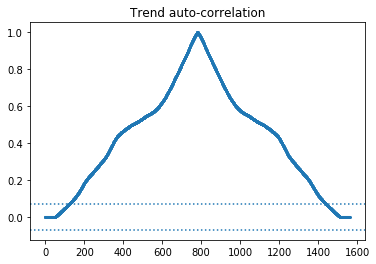

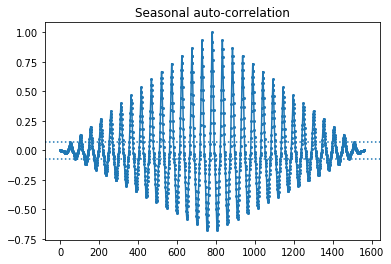

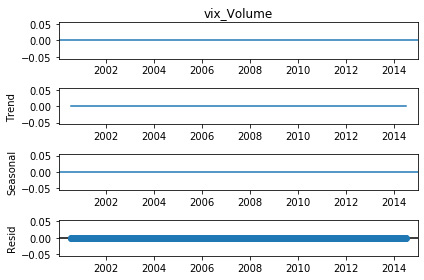

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


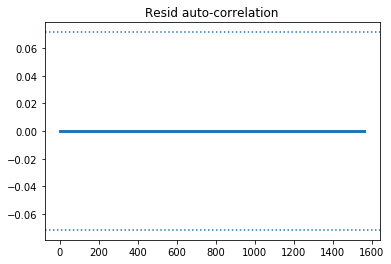

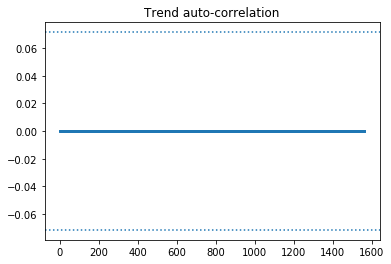

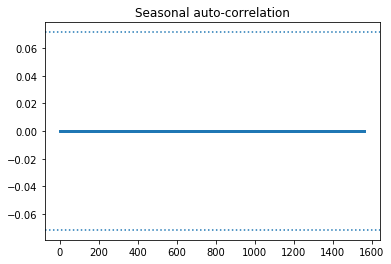

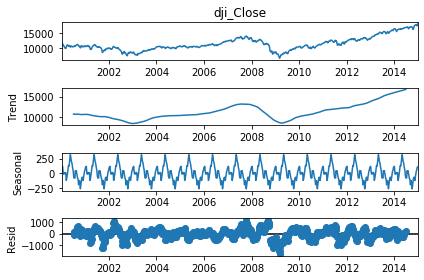

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


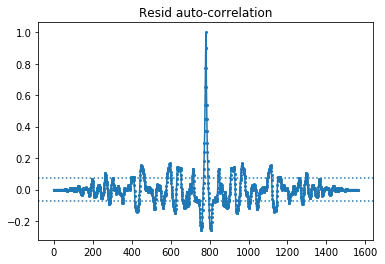

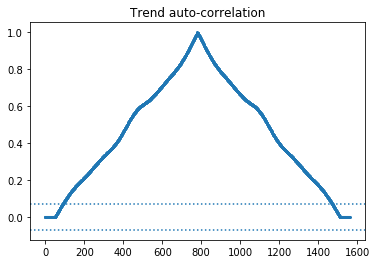

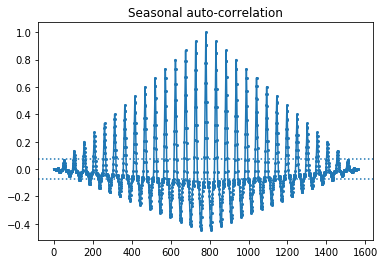

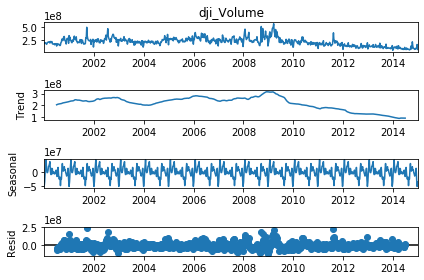

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


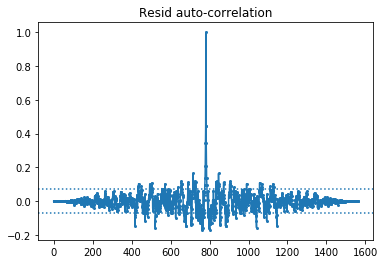

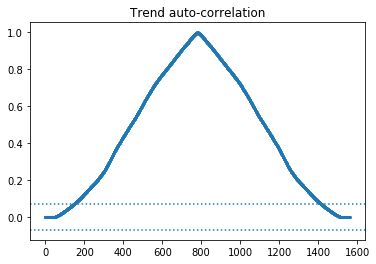

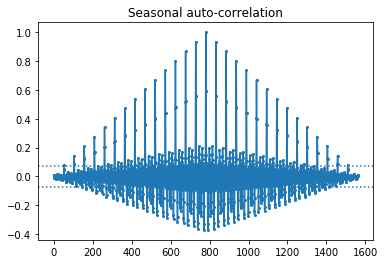

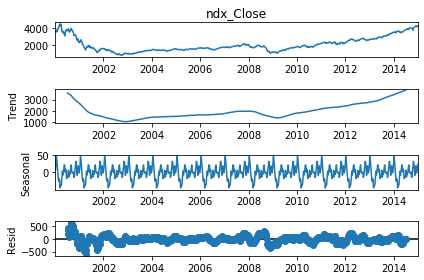

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


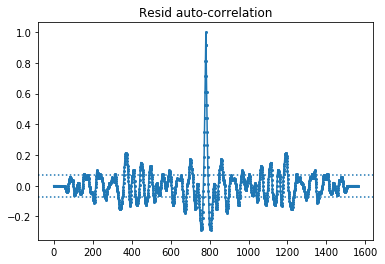

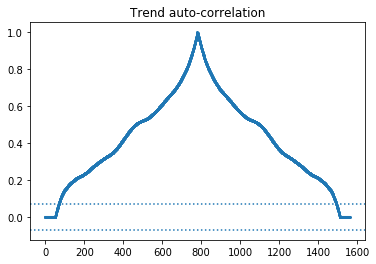

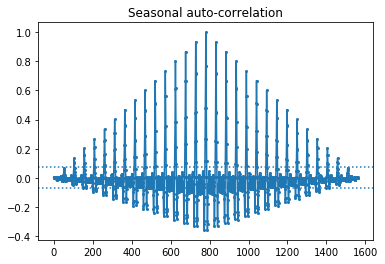

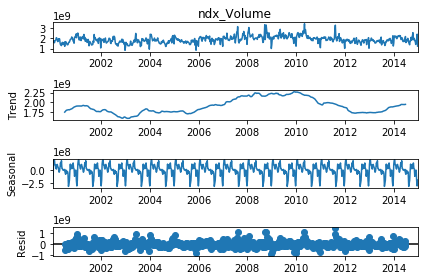

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


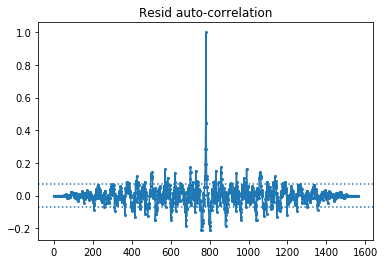

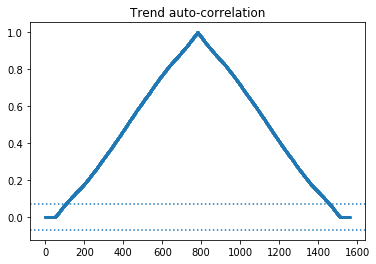

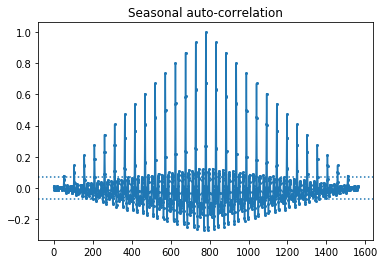

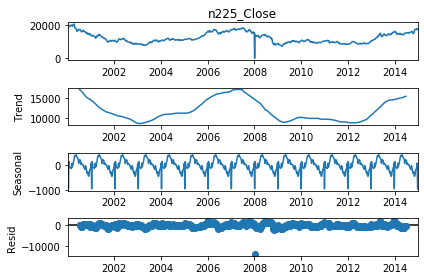

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


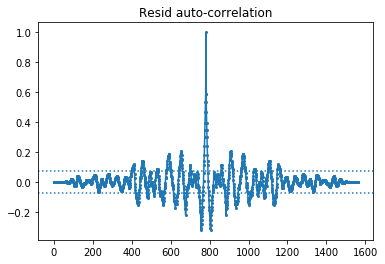

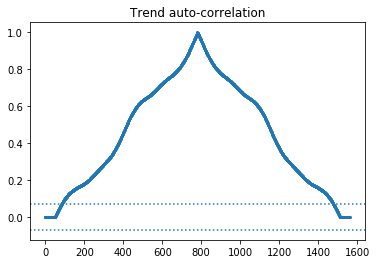

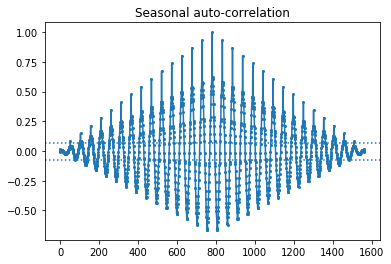

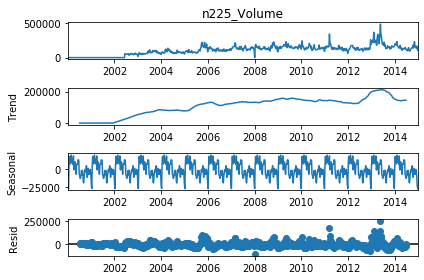

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


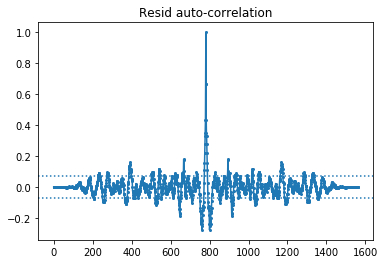

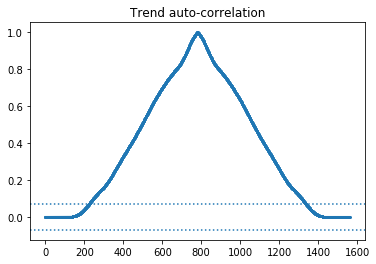

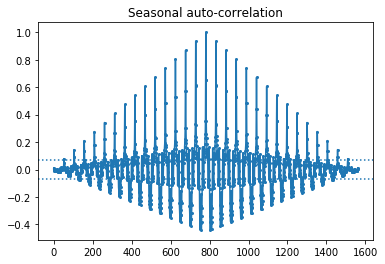

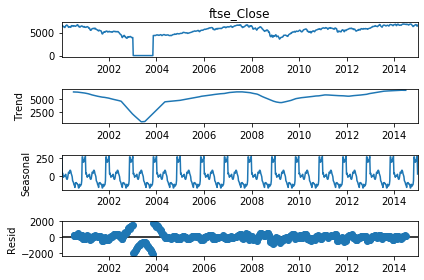

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


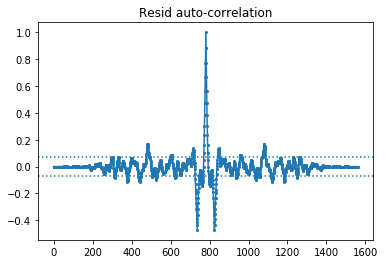

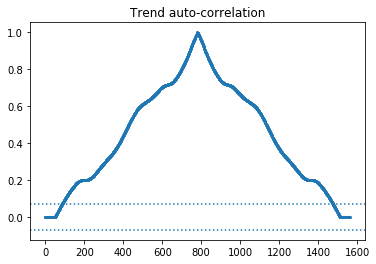

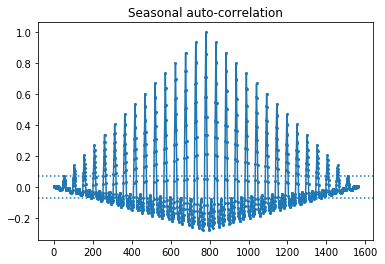

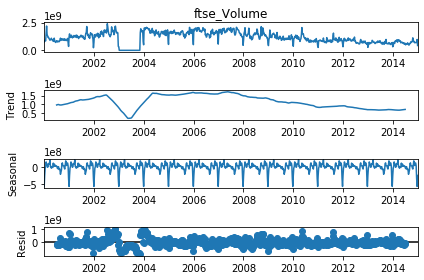

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


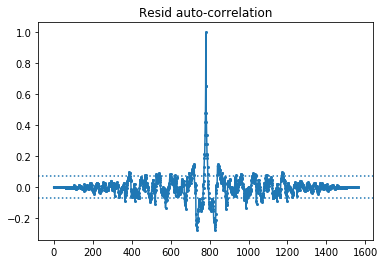

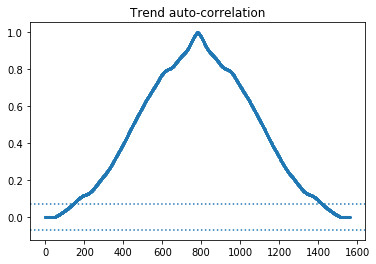

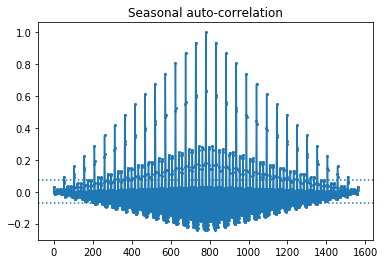

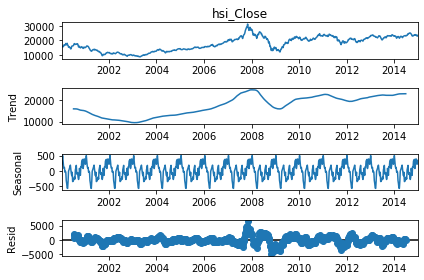

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


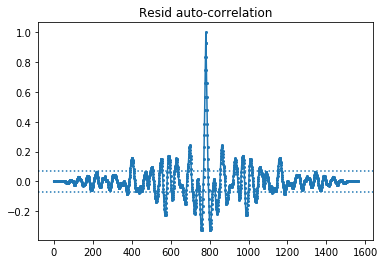

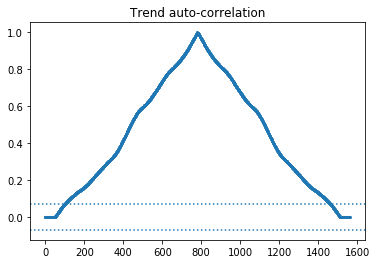

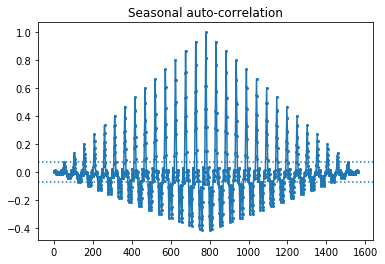

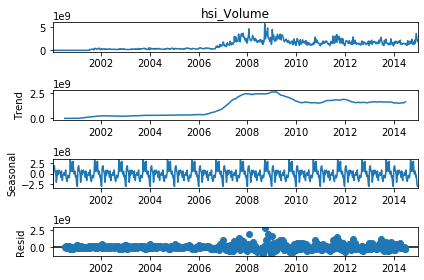

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


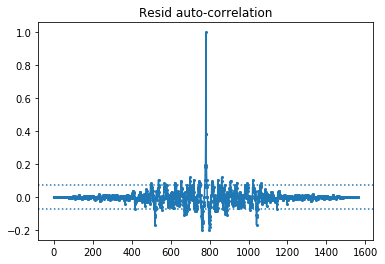

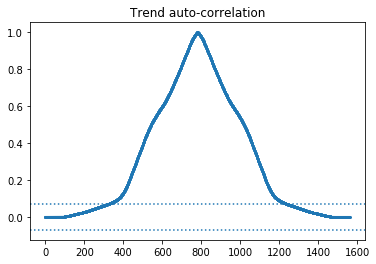

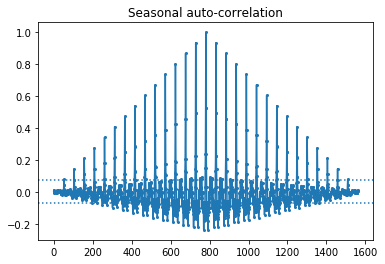

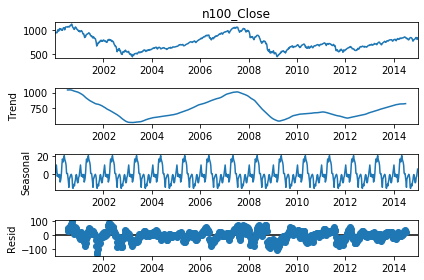

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


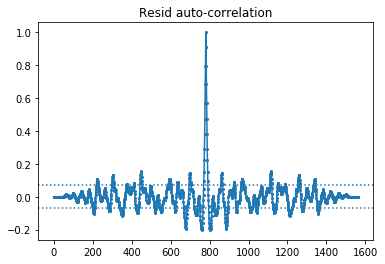

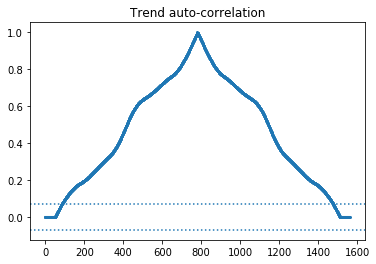

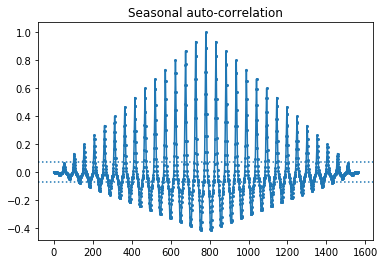

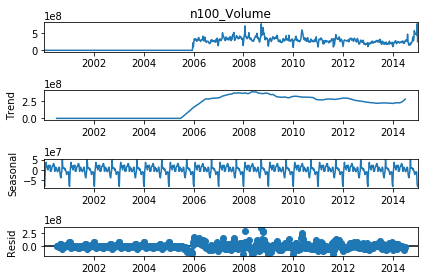

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


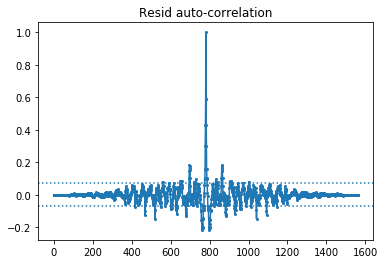

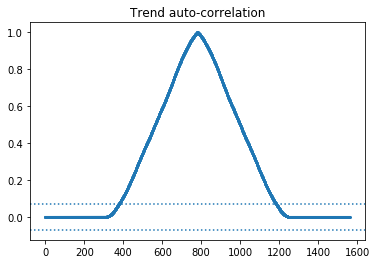

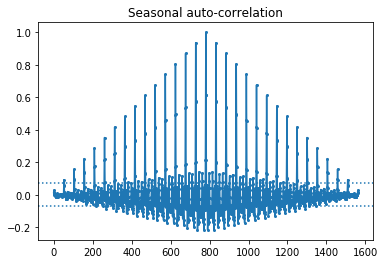

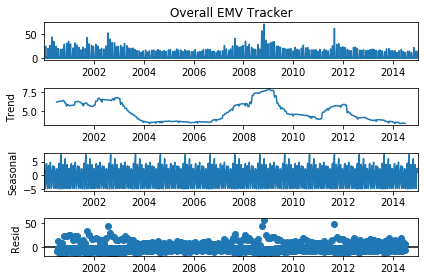

Resid is white noise?  False
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


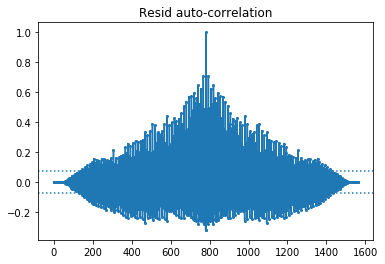

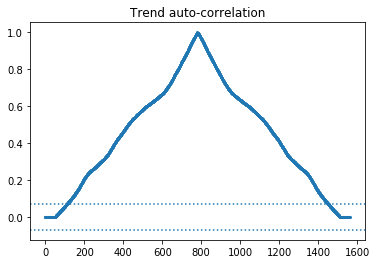

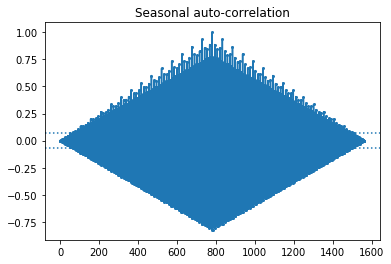

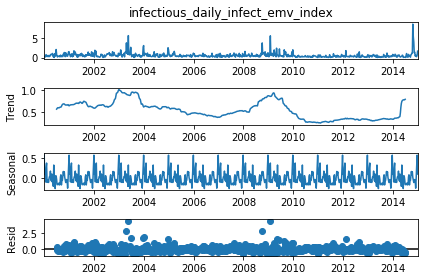

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


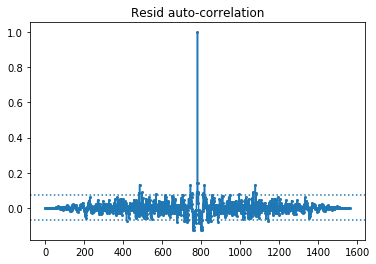

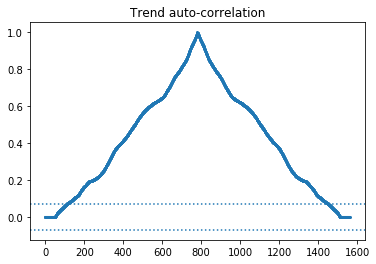

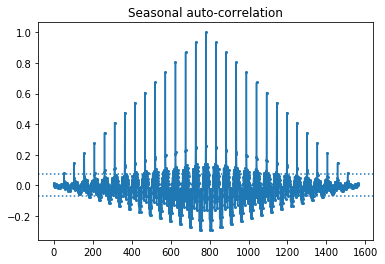

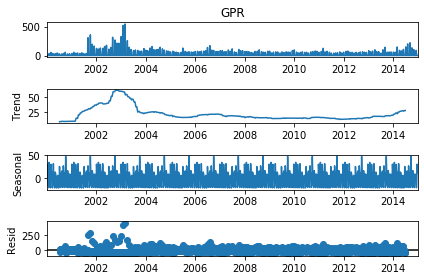

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


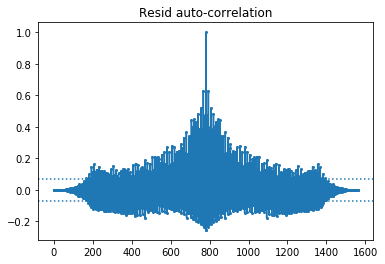

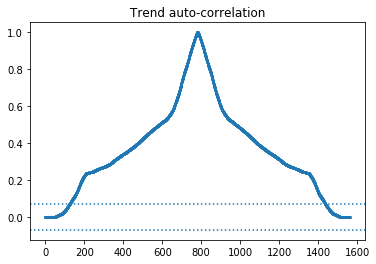

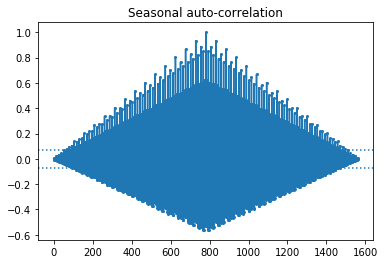

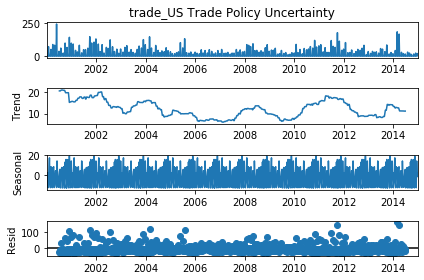

Resid is white noise?  False
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


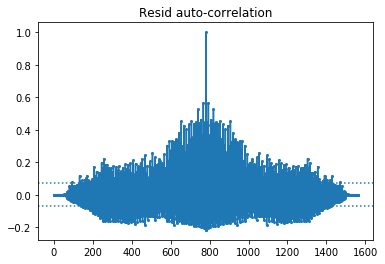

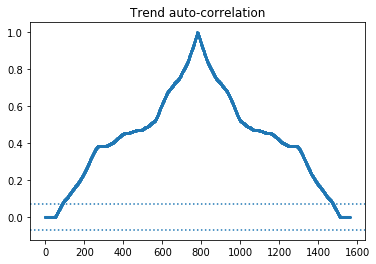

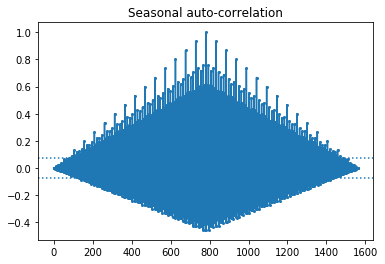

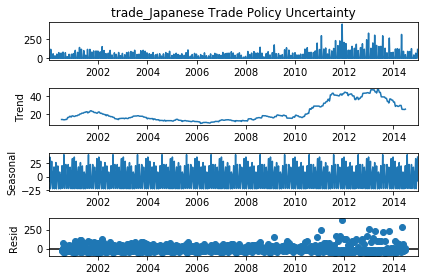

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


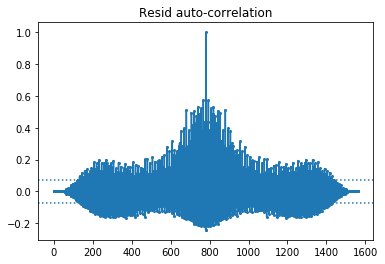

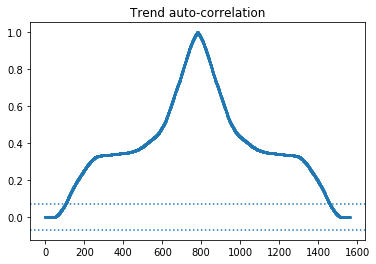

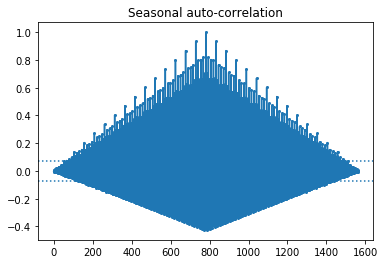

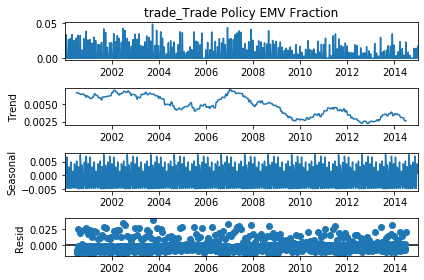

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


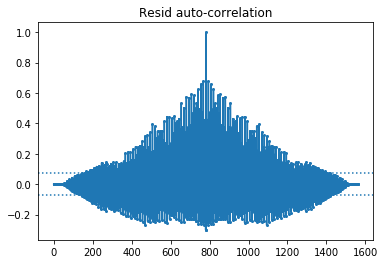

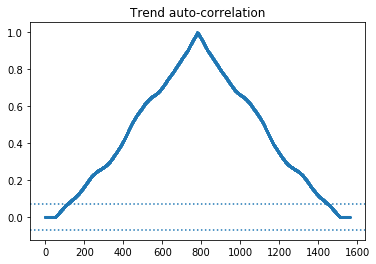

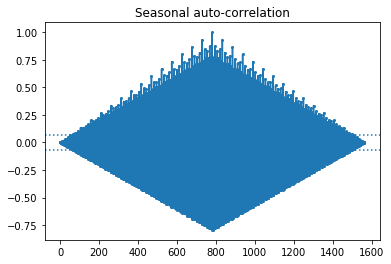

In [95]:
for col in df_filled.columns:
    resid, trend, seasonal = decompose_and_plot(df_filled.loc[:,col], True)
    df_decomposed_resid[col] = resid
    df_decomposed_trend[col] = trend
    df_decomposed_seasonal[col] = seasonal

In [66]:
for col in df_filled_test.columns:
    resid, trend, seasonal = decompose_and_plot(df_filled_test.loc[:,col])
    df_decomposed_resid_test[col] = resid
    df_decomposed_trend_test[col] = trend
    df_decomposed_seasonal_test[col] = seasonal

In [67]:
df_final_resid = df_decomposed_resid.mask(df_nan == True, np.nan)
df_final_trend = df_decomposed_trend.mask(df_nan == True, np.nan)
df_final_seasonal = df_decomposed_seasonal.mask(df_nan == True, np.nan)

df_final_resid_test = df_decomposed_resid_test.mask(df_nan_test == True, np.nan)
df_final_trend_test = df_decomposed_trend_test.mask(df_nan_test == True, np.nan)
df_final_seasonal_test = df_decomposed_seasonal_test.mask(df_nan_test == True, np.nan)

In [68]:
df_final_resid.describe()

sp500_Close  sp500_Volume   vix_Close  vix_Volume    dji_Close  \
count   730.000000  7.300000e+02  730.000000       730.0   730.000000   
mean     -0.655386  4.349479e+05   -0.031467         0.0    -2.630870   
std      50.600326  5.129646e+08    4.814511         0.0   418.555115   
min    -202.606408 -2.193658e+09  -16.086745         0.0 -1798.126400   
25%     -33.179654 -2.267550e+08   -2.653782         0.0  -254.337114   
50%       5.728087 -3.711156e+07   -0.774708         0.0    35.007647   
75%      30.995091  1.604337e+08    1.788884         0.0   270.337881   
max     151.220601  3.487265e+09   30.775585         0.0  1201.902231   

         dji_Volume   ndx_Close    ndx_Volume   n225_Close    n225_Volume  \
count  7.300000e+02  730.000000  7.300000e+02   729.000000     729.000000   
mean   1.580690e+05   -4.382391  1.992712e+06    -7.725824     266.953678   
std    4.397764e+07  130.414305  2.561576e+08   738.515325   28510.908240   
min   -1.298223e+08 -602.247972 -9.106282e+08 -2068.377435  -70757.715948   
25%   -2.619233e+07  -68.712290 -1.450309e+08  -484.729203  -16158.698091   
50%   -4.649804e+06   -3.475160 -1.812378e+07   -49.583098   -3225.314392   
75%    1.818250e+07   64.929433  1.184793e+08   525.524172   11470.564729   
max    2.429126e+08  629.497551  1.430858e+09  2511.719249  258510.718117   

       ...    hsi_Close    hsi_Volume  n100_Close   n100_Volume  \
count  ...   730.000000  7.300000e+02  730.000000  7.300000e+02   
mean   ...    -5.626068 -1.204720e+05    0.457965 -4.113709e+05   
std    ...  1200.111970  3.644219e+08   35.047991  5.338386e+07   
min    ... -4888.534183 -1.124931e+09 -135.102925 -1.627086e+08   
25%    ...  -609.834256 -1.866651e+08  -20.309149 -2.559233e+07   
50%    ...   -39.169848 -2.575620e+07    3.433851 -6.289933e+06   
75%    ...   671.536568  1.188927e+08   22.631926  1.820145e+07   
max    ...  6454.676297  2.880682e+09   99.421652  3.512924e+08   

       Overall EMV Tracker  infectious_daily_infect_emv_index         GPR  \
count           168.000000                         730.000000  167.000000   
mean             13.838572                          -0.008221   60.092203   
std               7.653124                           0.456852   60.937507   
min               3.853374                          -0.837880   -5.811868   
25%               8.981688                          -0.253612   33.225259   
50%              12.051753                          -0.059781   46.347632   
75%              16.554002                           0.134169   63.672509   
max              56.164446                           4.469584  458.921612   

       trade_US Trade Policy Uncertainty  \
count                         168.000000   
mean                           34.533405   
std                            31.381676   
min                           -12.144396   
25%                            12.621261   
50%                            27.406326   
75%                            47.393179   
max                           164.700029   

       trade_Japanese Trade Policy Uncertainty  \
count                               168.000000   
mean                                 63.817141   
std                                  55.973117   
min                                 -11.868164   
25%                                  29.883754   
50%                                  50.564419   
75%                                  80.661440   
max                                 376.497347   

       trade_Trade Policy EMV Fraction  
count                       168.000000  
mean                          0.013476  
std                           0.009000  
min                          -0.009457  
25%                           0.006675  
50%                           0.012867  
75%                           0.019820  
max                           0.038433  

[8 rows x 22 columns]

In [69]:
df_train.describe()

sp500_Close  sp500_Volume   vix_Close  vix_Volume     dji_Close  \
count   782.000000  7.820000e+02  782.000000       782.0    782.000000   
mean   1281.653213  2.902449e+09   20.935473         0.0  11469.188092   
std     268.493750  1.563336e+09    8.896769         0.0   2244.991509   
min     695.190002  7.561175e+08   10.185000         0.0   6717.305957   
25%    1112.059503  1.445655e+09   14.710000         0.0  10132.439465   
50%    1258.024994  2.752496e+09   19.075000         0.0  10868.171973   
75%    1418.054331  3.932839e+09   24.711500         0.0  12651.721167   
max    2082.839966  9.328214e+09   72.916000         0.0  18016.882813   

         dji_Volume    ndx_Close    ndx_Volume    n225_Close    n225_Volume  \
count  7.820000e+02   782.000000  7.820000e+02    781.000000     781.000000   
mean   2.130479e+08  2086.468993  1.892986e+09  12292.903569  106593.043107   
std    7.659621e+07   837.038157  3.402221e+08   3053.242766   66114.421121   
min    5.249000e+07   832.747998  8.335525e+08   7256.931933       0.000000   
25%    1.607485e+08  1494.614008  1.689754e+09   9727.933984   66460.000000   
50%    2.131680e+08  1810.356995  1.878901e+09  11385.775977  116900.000000   
75%    2.561680e+08  2571.654504  2.079784e+09  14905.450000  145160.000000   
max    5.591660e+08  4531.904004  3.454752e+09  20587.178125  483080.000000   

       ...     hsi_Close    hsi_Volume   n100_Close   n100_Volume  \
count  ...    782.000000  7.820000e+02   782.000000  7.820000e+02   
mean   ...  17650.351383  1.115250e+09   747.758184  1.762382e+08   
std    ...   4913.626292  9.440066e+08   156.458846  1.591196e+08   
min    ...   8485.657471  0.000000e+00   442.902008  0.000000e+00   
25%    ...  13527.720459  2.709059e+08   630.268008  0.000000e+00   
50%    ...  17930.260791  1.160695e+09   716.954999  2.217146e+08   
75%    ...  21990.551270  1.759731e+09   848.638501  2.986197e+08   
max    ...  31307.784375  5.632904e+09  1135.616016  7.590642e+08   

       Overall EMV Tracker  infectious_daily_infect_emv_index         GPR  \
count           180.000000                         782.000000  179.000000   
mean             21.256181                           0.554081   92.267518   
std               8.651788                           0.629305   72.900951   
min              11.186194                           0.000000   27.208537   
25%              15.514346                           0.230000   56.635628   
50%              18.680335                           0.404286   70.112959   
75%              24.429409                           0.681429   99.402152   
max              69.834999                           8.691429  545.093671   

       trade_US Trade Policy Uncertainty  \
count                         180.000000   
mean                           52.832238   
std                            37.652075   
min                            10.564281   
25%                            25.706975   
50%                            42.943154   
75%                            67.079824   
max                           245.009584   

       trade_Japanese Trade Policy Uncertainty  \
count                               180.000000   
mean                                 93.838922   
std                                  64.829423   
min                                  13.318538   
25%                                  53.898044   
50%                                  74.082525   
75%                                 116.183672   
max                                 450.400191   

       trade_Trade Policy EMV Fraction  
count                       180.000000  
mean                          0.020574  
std                           0.010469  
min                           0.000000  
25%                           0.012374  
50%                           0.019803  
75%                           0.027557  
max                           0.048611  

[8 rows x 22 columns]

In [70]:
df_final_resid_test.describe()

sp500_Close  sp500_Volume   vix_Close  vix_Volume    dji_Close  \
count   221.000000  2.210000e+02  221.000000       221.0   221.000000   
mean     -7.502013  2.427490e+07    0.192173         0.0   -52.827834   
std      72.657201  3.543930e+08    3.342808         0.0   662.363306   
min    -278.254029 -8.995788e+08   -7.049678         0.0 -2445.148985   
25%     -52.669012 -1.847717e+08   -2.072678         0.0  -432.212748   
50%      -5.103422 -9.007383e+06   -0.236283         0.0   -31.574449   
75%      26.761672  1.672114e+08    2.070808         0.0   288.781499   
max     210.460219  1.924886e+09   12.241056         0.0  2186.680166   

         dji_Volume   ndx_Close    ndx_Volume   n225_Close   n225_Volume  ...  \
count  2.210000e+02  221.000000  2.210000e+02   220.000000    220.000000  ...   
mean   3.388693e+06  -21.711256  6.406192e+06    10.139789    377.498676  ...   
std    5.529851e+07  225.737184  2.322969e+08   953.202807  17135.703904  ...   
min   -1.239356e+08 -777.961656 -7.879830e+08 -2202.115011 -39855.048508  ...   
25%   -2.906218e+07 -157.175355 -1.262408e+08  -574.494230  -9550.381842  ...   
50%    2.119039e+06  -26.340221 -9.935010e+06   -75.730594   -826.582964  ...   
75%    3.050109e+07  102.975262  9.749428e+07   437.144256   8725.492357  ...   
max    3.185438e+08  605.097384  1.673957e+09  5421.289187  93388.935466  ...   

         hsi_Close    hsi_Volume  n100_Close   n100_Volume  \
count   221.000000  2.210000e+02  221.000000  2.210000e+02   
mean    -79.888457  1.915237e+06   -2.920596  1.167022e+06   
std    1096.691335  3.603846e+08   29.465734  6.672915e+07   
min   -2297.143666 -1.138685e+09 -100.065716 -1.633137e+08   
25%    -897.487109 -2.037083e+08  -24.352546 -3.617970e+07   
50%    -123.818318 -3.440119e+07    0.369434  4.603160e+06   
75%     667.030602  2.068498e+08   20.309296  3.932637e+07   
max    3114.370977  1.684365e+09   63.498762  3.002254e+08   

       Overall EMV Tracker  infectious_daily_infect_emv_index         GPR  \
count            50.000000                         221.000000   51.000000   
mean              4.010241                          -0.031923   32.495698   
std               7.416670                           0.315369   52.019915   
min              -8.682574                          -2.051329  -42.670739   
25%              -0.486813                          -0.188832  -13.010350   
50%               1.938250                          -0.055024   24.684597   
75%               7.369444                           0.139880   63.641286   
max              27.522098                           0.821999  183.389386   

       trade_US Trade Policy Uncertainty  \
count                          49.000000   
mean                           56.685935   
std                           228.777219   
min                          -377.010916   
25%                           -84.753257   
50%                            30.987247   
75%                           158.899867   
max                           854.460995   

       trade_Japanese Trade Policy Uncertainty  \
count                                49.000000   
mean                                 62.707144   
std                                 153.150996   
min                                -207.027317   
25%                                 -68.017409   
50%                                  74.380525   
75%                                 137.082586   
max                                 396.574932   

       trade_Trade Policy EMV Fraction  
count                        49.000000  
mean                          0.020197  
std                           0.084140  
min                          -0.094295  
25%                          -0.049439  
50%                          -0.004374  
75%                           0.088178  
max                           0.201975  

[8 rows x 22 columns]

In [71]:
df_final_resid.describe()

sp500_Close  sp500_Volume   vix_Close  vix_Volume    dji_Close  \
count   730.000000  7.300000e+02  730.000000       730.0   730.000000   
mean     -0.655386  4.349479e+05   -0.031467         0.0    -2.630870   
std      50.600326  5.129646e+08    4.814511         0.0   418.555115   
min    -202.606408 -2.193658e+09  -16.086745         0.0 -1798.126400   
25%     -33.179654 -2.267550e+08   -2.653782         0.0  -254.337114   
50%       5.728087 -3.711156e+07   -0.774708         0.0    35.007647   
75%      30.995091  1.604337e+08    1.788884         0.0   270.337881   
max     151.220601  3.487265e+09   30.775585         0.0  1201.902231   

         dji_Volume   ndx_Close    ndx_Volume   n225_Close    n225_Volume  \
count  7.300000e+02  730.000000  7.300000e+02   729.000000     729.000000   
mean   1.580690e+05   -4.382391  1.992712e+06    -7.725824     266.953678   
std    4.397764e+07  130.414305  2.561576e+08   738.515325   28510.908240   
min   -1.298223e+08 -602.247972 -9.106282e+08 -2068.377435  -70757.715948   
25%   -2.619233e+07  -68.712290 -1.450309e+08  -484.729203  -16158.698091   
50%   -4.649804e+06   -3.475160 -1.812378e+07   -49.583098   -3225.314392   
75%    1.818250e+07   64.929433  1.184793e+08   525.524172   11470.564729   
max    2.429126e+08  629.497551  1.430858e+09  2511.719249  258510.718117   

       ...    hsi_Close    hsi_Volume  n100_Close   n100_Volume  \
count  ...   730.000000  7.300000e+02  730.000000  7.300000e+02   
mean   ...    -5.626068 -1.204720e+05    0.457965 -4.113709e+05   
std    ...  1200.111970  3.644219e+08   35.047991  5.338386e+07   
min    ... -4888.534183 -1.124931e+09 -135.102925 -1.627086e+08   
25%    ...  -609.834256 -1.866651e+08  -20.309149 -2.559233e+07   
50%    ...   -39.169848 -2.575620e+07    3.433851 -6.289933e+06   
75%    ...   671.536568  1.188927e+08   22.631926  1.820145e+07   
max    ...  6454.676297  2.880682e+09   99.421652  3.512924e+08   

       Overall EMV Tracker  infectious_daily_infect_emv_index         GPR  \
count           168.000000                         730.000000  167.000000   
mean             13.838572                          -0.008221   60.092203   
std               7.653124                           0.456852   60.937507   
min               3.853374                          -0.837880   -5.811868   
25%               8.981688                          -0.253612   33.225259   
50%              12.051753                          -0.059781   46.347632   
75%              16.554002                           0.134169   63.672509   
max              56.164446                           4.469584  458.921612   

       trade_US Trade Policy Uncertainty  \
count                         168.000000   
mean                           34.533405   
std                            31.381676   
min                           -12.144396   
25%                            12.621261   
50%                            27.406326   
75%                            47.393179   
max                           164.700029   

       trade_Japanese Trade Policy Uncertainty  \
count                               168.000000   
mean                                 63.817141   
std                                  55.973117   
min                                 -11.868164   
25%                                  29.883754   
50%                                  50.564419   
75%                                  80.661440   
max                                 376.497347   

       trade_Trade Policy EMV Fraction  
count                       168.000000  
mean                          0.013476  
std                           0.009000  
min                          -0.009457  
25%                           0.006675  
50%                           0.012867  
75%                           0.019820  
max                           0.038433  

[8 rows x 22 columns]

In [72]:
df_final_resid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2000-01-07 to 2014-12-26
Data columns (total 22 columns):
sp500_Close                                730 non-null float64
sp500_Volume                               730 non-null float64
vix_Close                                  730 non-null float64
vix_Volume                                 730 non-null float64
dji_Close                                  730 non-null float64
dji_Volume                                 730 non-null float64
ndx_Close                                  730 non-null float64
ndx_Volume                                 730 non-null float64
n225_Close                                 729 non-null float64
n225_Volume                                729 non-null float64
ftse_Close                                 686 non-null float64
ftse_Volume                                686 non-null float64
hsi_Close                                  730 non-null float64
hsi_Volume                                 7

In [73]:
df_final_resid_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2015-01-02 to 2020-03-20
Data columns (total 22 columns):
sp500_Close                                221 non-null float64
sp500_Volume                               221 non-null float64
vix_Close                                  221 non-null float64
vix_Volume                                 221 non-null float64
dji_Close                                  221 non-null float64
dji_Volume                                 221 non-null float64
ndx_Close                                  221 non-null float64
ndx_Volume                                 221 non-null float64
n225_Close                                 220 non-null float64
n225_Volume                                220 non-null float64
ftse_Close                                 220 non-null float64
ftse_Volume                                220 non-null float64
hsi_Close                                  221 non-null float64
hsi_Volume                                 2

In [74]:
df_white_noise_train, df_white_noise_test =  meanImputation.input(df_final_resid, df_final_resid_test)

In [75]:
df_seasonal_train, df_seasonal_test = splineInterpolation.input(df_final_seasonal, df_final_seasonal_test)

In [76]:
df_trended_train, df_trended_test = forwardFilling.input(df_final_trend, df_final_trend_test)

In [77]:
df_final_train = df_white_noise_train + df_seasonal_train + df_trended_train
df_final_test = df_white_noise_test + df_seasonal_test + df_trended_test

In [78]:
df_final_train

sp500_Close  sp500_Volume  vix_Close  vix_Volume     dji_Close  \
2000-01-07  1431.932646  3.031014e+08  22.570398         0.0  10816.675933   
2000-01-14  1435.148573  3.024809e+08  22.639629         0.0  10827.929670   
2000-01-21  1440.525857  1.029892e+09  22.065281         0.0  10839.458979   
2000-01-28  1433.677528  1.164465e+09  22.230324         0.0  10748.429743   
2000-02-04  1426.321809  1.350010e+09  23.291117         0.0  10706.555429   
2000-02-11  1426.205604  1.204788e+09  23.003351         0.0  10733.604949   
2000-02-18  1422.236451  1.147484e+09  23.055603         0.0  10712.265940   
2000-02-25  1420.085998  9.953825e+08  23.186741         0.0  10713.372821   
2000-03-03  1424.362131  8.268907e+08  22.811845         0.0  10735.154622   
2000-03-10  1423.807927  1.029769e+09  22.987135         0.0  10725.354799   
2000-03-17  1408.518647  1.087203e+09  23.993302         0.0  10598.735975   
2000-03-24  1413.352445  1.261312e+09  23.669308         0.0  10628.459118   
2000-03-31  1418.415304  1.358513e+09  23.033563         0.0  10676.561743   
2000-04-07  1424.756013  1.110069e+09  22.719894         0.0  10732.452788   
2000-04-14  1432.447597  9.381146e+08  21.952583         0.0  10805.749436   
2000-04-21  1439.258833  9.631342e+08  21.020049         0.0  10852.924419   
2000-04-28  1437.965686  1.212580e+09  21.093009         0.0  10842.738672   
2000-05-05  1441.421894  1.256118e+09  21.190662         0.0  10901.441960   
2000-05-12  1448.818328  1.107149e+09  21.006045         0.0  10978.011573   
2000-05-19  1454.159357  1.376339e+09  21.270678         0.0  11038.584555   
2000-05-26  1450.795856  1.072094e+09  21.264133         0.0  10996.516166   
2000-06-02  1444.774948  1.148551e+09  21.954105         0.0  10933.593566   
2000-06-09  1444.645377  9.481215e+08  21.876320         0.0  10907.683859   
2000-06-16  1441.325927  1.065632e+09  22.431835         0.0  10868.885693   
2000-06-23  1433.008167  9.979968e+08  22.711224         0.0  10809.241240   
2000-06-30  1430.715785  9.584805e+08  22.183753         0.0  10776.776133   
2000-07-07  1462.835022  8.375500e+08  20.287500         0.0  10540.429932   
2000-07-14  1491.047998  9.615600e+08  19.964001         0.0  10751.798047   
2000-07-21  1492.389966  9.513200e+08  19.346001         0.0  10763.539844   
2000-07-28  1452.138013  1.044380e+09  19.884000         0.0  10599.774024   
...                 ...           ...        ...         ...           ...   
2014-06-06  1933.397974  2.829538e+09  11.588000         0.0  16792.777734   
2014-06-13  1942.444019  2.772774e+09  11.696000         0.0  16848.566015   
2014-06-20  1951.819995  3.250200e+09  11.358000         0.0  16872.932031   
2014-06-27  1958.059985  3.196694e+09  11.518000         0.0  16864.174219   
2014-07-04  1922.413286  3.231657e+09  13.105528         0.0  16674.897065   
2014-07-11  1916.042458  3.432390e+09  13.427954         0.0  16665.863753   
2014-07-18  1928.322562  3.421547e+09  12.420032         0.0  16787.228864   
2014-07-25  1924.816041  3.389244e+09  13.628608         0.0  16758.153431   
2014-08-01  1926.896835  3.461281e+09  13.229634         0.0  16788.733427   
2014-08-08  1924.334878  3.161739e+09  13.924971         0.0  16747.972367   
2014-08-15  1922.234841  2.902519e+09  13.587636         0.0  16707.593168   
2014-08-22  1916.145462  3.086696e+09  14.797561         0.0  16657.749813   
2014-08-29  1916.271600  3.094913e+09  14.893286         0.0  16644.491727   
2014-09-05  1909.443753  3.416799e+09  15.763102         0.0  16547.911429   
2014-09-12  1912.673208  3.750549e+09  15.505345         0.0  16558.432589   
2014-09-19  1917.887626  3.412573e+09  15.265480         0.0  16618.855457   
2014-09-26  1908.430907  3.417837e+09  17.096252         0.0  16563.490933   
2014-10-03  1901.382689  3.440720e+09  17.869851         0.0  16479.294331   
2014-10-10  1907.132417  3.478250e+09  17.038507         0.0  16538.757942   
2014-10-17  1912.927545  3.508093e

In [79]:
df_train

sp500_Close  sp500_Volume  vix_Close  vix_Volume     dji_Close  \
2000-01-07  1420.333984  1.068760e+09  25.016000         0.0  11250.781836   
2000-01-14  1448.648023  1.033940e+09  21.684000         0.0  11587.958008   
2000-01-21  1449.492493  1.113750e+09  21.447500         0.0  11413.272461   
2000-01-28  1394.874023  1.106420e+09  23.960000         0.0  10967.587890   
2000-02-04  1412.439990  1.041000e+09  23.014001         0.0  10992.404102   
2000-02-11  1416.323975  1.020160e+09  22.886000         0.0  10726.277930   
2000-02-18  1382.802002  1.023060e+09  23.996000         0.0  10506.685938   
2000-02-25  1349.912506  1.063475e+09  24.832500         0.0  10121.330078   
2000-03-03  1376.918018  1.170760e+09  21.992000         0.0  10167.401953   
2000-03-10  1382.071972  1.161580e+09  22.616000         0.0   9952.522266   
2000-03-17  1411.569995  1.238060e+09  22.548000         0.0  10223.122070   
2000-03-24  1501.189990  1.038440e+09  22.344000         0.0  10937.372070   
2000-03-31  1505.321997  1.068560e+09  24.614000         0.0  10976.569922   
2000-04-07  1501.151978  1.109412e+09  26.220000         0.0  11129.287891   
2000-04-14  1453.858008  1.062540e+09  29.022000         0.0  10965.617773   
2000-04-21  1426.264984  1.052925e+09  26.985001         0.0  10717.234863   
2000-04-28  1457.128003  1.007000e+09  26.394000         0.0  10919.685937   
2000-05-05  1434.367993  9.401400e+08  28.862000         0.0  10602.676172   
2000-05-12  1409.626026  9.004800e+08  28.162000         0.0  10532.700000   
2000-05-19  1442.071997  8.584400e+08  24.516000         0.0  10783.244140   
2000-05-26  1386.634009  9.196600e+08  25.048000         0.0  10424.665820   
2000-06-02  1442.279999  9.818000e+08  22.777500         0.0  10624.104981   
2000-06-09  1463.089990  8.567200e+08  22.629999         0.0  10729.301953   
2000-06-16  1465.833984  9.803800e+08  21.330000         0.0  10607.624024   
2000-06-23  1466.947998  9.666200e+08  21.292000         0.0  10454.322070   
2000-06-30  1451.534009  1.119440e+09  20.756001         0.0  10484.233984   
2000-07-07  1462.835022  8.375500e+08  20.287500         0.0  10540.429932   
2000-07-14  1491.047998  9.615600e+08  19.964001         0.0  10751.798047   
2000-07-21  1492.389966  9.513200e+08  19.346001         0.0  10763.539844   
2000-07-28  1452.138013  1.044380e+09  19.884000         0.0  10599.774024   
...                 ...           ...        ...         ...           ...   
2014-06-06  1933.397974  2.829538e+09  11.588000         0.0  16792.777734   
2014-06-13  1942.444019  2.772774e+09  11.696000         0.0  16848.566015   
2014-06-20  1951.819995  3.250200e+09  11.358000         0.0  16872.932031   
2014-06-27  1958.059985  3.196694e+09  11.518000         0.0  16864.174219   
2014-07-04  1973.402466  2.768790e+09  10.965000         0.0  16956.792481   
2014-07-11  1969.287988  2.938562e+09  11.926000         0.0  16955.064063   
2014-07-18  1973.657983  3.190470e+09  12.276000         0.0  17066.257813   
2014-07-25  1982.097998  2.842770e+09  12.220000         0.0  17059.254297   
2014-08-01  1954.950000  3.483506e+09  14.630000         0.0  16766.345703   
2014-08-08  1924.119971  3.241478e+09  16.158000         0.0  16472.857813   
2014-08-15  1945.526026  2.749490e+09  13.366000         0.0  16631.762109   
2014-08-22  1984.123999  2.562986e+09  11.908000         0.0  16955.634375   
2014-08-29  1999.634009  2.314342e+09  11.850000         0.0  17096.719532   
2014-09-05  2002.089996  2.880168e+09  12.335000         0.0  17088.194824   
2014-09-12  1993.731982  2.946522e+09  13.030000         0.0  17046.101953   
2014-09-19  2001.287988  3.452364e+09  12.728000         0.0  17173.138281   
2014-09-26  1984.840015  3.229072e+09  14.476000         0.0  17099.512110   
2014-10-03  1962.064038  3.761522e+09  15.942000         0.0  16945.914453   
2014-10-10  1940.629981  4.076508e+09  17.554000         0.0  16781.774219   
2014-10-17  1872.889990  4.962132e

In [80]:
# Subsample para weekly

# Generating weekly sampled dataset
def generate_weekly(df, initial_friday):
    df_friday = initial_friday #datetime(2000,1,7)

    df_weekly = pd.DataFrame(columns = df.columns)
    
    while df_friday <= df.tail(1).index:
        df_weekly = df_weekly.append(df.loc[df_friday])
        df_friday+=timedelta(days=7)
    return df_weekly

In [81]:
df_train_weekly = generate_weekly(df_final_train, datetime(2000,1,7))
df_test_weekly = generate_weekly(df_final_test, datetime(2015,1,2))

In [82]:
df_train_weekly.to_csv(r'output\/CompleteIndexesWeeklyTrain_decomp.csv', index = True)
df_test_weekly.to_csv(r'output\/CompleteIndexesWeeklyTest.csv_decomp', index = True)